# Lead Scoring Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot.

### Step 1: Importing and Merging Data

In [18]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Importing The datasets
Leads = pd.read_csv("Leads.csv")
Leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [21]:
Leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [22]:
for columb in Leads:
    Leads[columb] = Leads[columb].fillna(0)

In [23]:
Leads.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [4]:
# Finding the total number of records
Leads.shape

(9240, 37)

In [5]:
# Datatypes of all the Features
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Analysing values for all the features

In [6]:
Leads['Lead Origin'].value_counts(normalize=True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

In [7]:
Leads['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Live Chat             0.021730
Social Media          0.021730
testone               0.010865
youtubechannel        0.010865
Pay per Click Ads     0.010865
NC_EDM                0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
blog                  0.010865
Name: Lead Source, dtype: float64

In [8]:
Leads['Do Not Email'].value_counts(normalize=True)*100

No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64

In [9]:
Leads['Do Not Call'].value_counts(normalize=True)*100

No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64

In [10]:
Leads['Converted'].value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

In [11]:
Leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [12]:
Leads['Country'].value_counts(normalize=True)*100 

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Kuwait                   0.059006
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Canada                   0.059006
Sweden                   0.044254
Philippines              0.029503
Italy                    0.029503
Ghana                    0.029503
Netherlands              0.029503
Belgium                  0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
China                    0.029503
Bangladesh               0.029503
Vietnam                  0.014751
Russia        

In [13]:
Leads['Specialization'].value_counts(normalize=True)*100

Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Media and Advertising                 2.601897
Travel and Tourism                    2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64

In [14]:
Leads['How did you hear about X Education'].value_counts(normalize=True)*100

Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64

In [15]:
Leads['What is your current occupation'].value_counts(normalize=True)*100 #make a plot

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

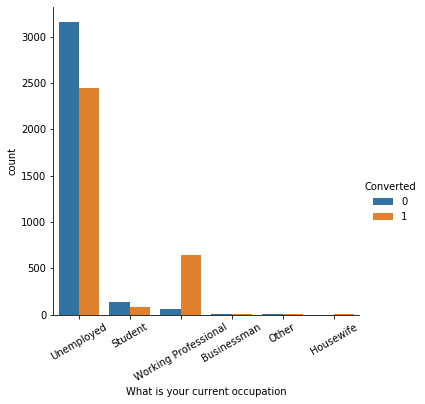

In [16]:
# Creating a chart to see if this feature holds high Weightage
g = sns.catplot(x="What is your current occupation", hue="Converted", kind="count", data=Leads,)
g = g.set_xticklabels(rotation=30)

In [17]:
Leads['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [18]:
Leads['Search'].value_counts(normalize=True)*100

No     99.848485
Yes     0.151515
Name: Search, dtype: float64

In [19]:
Leads['Magazine'].value_counts(normalize=True)*100

No    100.0
Name: Magazine, dtype: float64

In [20]:
Leads['Newspaper Article'].value_counts(normalize=True)*100

No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64

In [21]:
Leads['X Education Forums'].value_counts(normalize=True)*100

No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64

In [22]:
Leads['Newspaper'].value_counts(normalize=True)*100

No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64

In [23]:
Leads['Digital Advertisement'].value_counts(normalize=True)*100

No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64

In [24]:
Leads['Through Recommendations'].value_counts(normalize=True)*100

No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64

In [25]:
Leads['Receive More Updates About Our Courses'].value_counts(normalize=True)*100

No    100.0
Name: Receive More Updates About Our Courses, dtype: float64

In [26]:
Leads['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [27]:
Leads['Lead Quality'].value_counts(normalize=True)*100

Might be             34.875922
Not Sure             24.413146
High in Relevance    14.241002
Worst                13.436173
Low in Relevance     13.033758
Name: Lead Quality, dtype: float64

In [28]:
Leads['Update me on Supply Chain Content'].value_counts(normalize=True)*100

No    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [29]:
Leads['Get updates on DM Content'].value_counts(normalize=True)*100

No    100.0
Name: Get updates on DM Content, dtype: float64

In [30]:
Leads['Lead Profile'].value_counts(normalize=True)*100

Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64

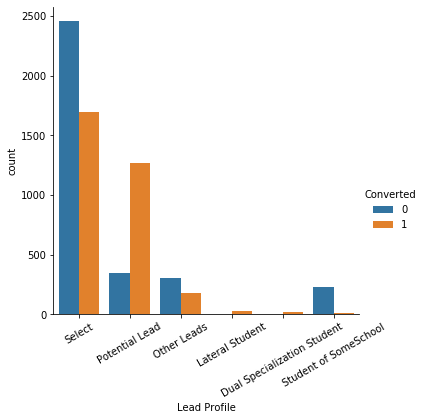

In [31]:
#Checking Lead profile's converted is to not converted ratio
g = sns.catplot(x="Lead Profile", hue="Converted", kind="count", data=Leads,)
g = g.set_xticklabels(rotation=30)

In [32]:
Leads['City'].value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [33]:
Leads['Asymmetrique Activity Index'].value_counts(normalize=True)*100

02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64

In [34]:
Leads['Asymmetrique Profile Index'].value_counts(normalize=True)*100

02.Medium    55.515731
01.High      43.866985
03.Low        0.617284
Name: Asymmetrique Profile Index, dtype: float64

In [35]:
Leads['Asymmetrique Activity Score'].value_counts(normalize=True)*100

14.0    35.264835
15.0    25.746714
13.0    15.432099
16.0     9.299084
17.0     6.949423
12.0     3.902828
11.0     1.891677
10.0     1.135006
9.0      0.179211
18.0     0.099562
8.0      0.079650
7.0      0.019912
Name: Asymmetrique Activity Score, dtype: float64

In [36]:
Leads['Asymmetrique Profile Score'].value_counts(normalize=True)*100

15.0    35.025886
18.0    21.326165
16.0    11.927519
17.0    11.529271
20.0     6.133015
19.0     4.878534
14.0     4.500199
13.0     4.062127
12.0     0.438072
11.0     0.179211
Name: Asymmetrique Profile Score, dtype: float64

In [37]:
Leads['I agree to pay the amount through cheque'].value_counts(normalize=True)*100

No    100.0
Name: I agree to pay the amount through cheque, dtype: float64

In [38]:
Leads['A free copy of Mastering The Interview'].value_counts(normalize=True)*100

No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [39]:
Leads['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Resubscribed to emails           0.010823
Email Received                   0.010823
Approached upfront               0.010823
Name: Last Notable Activity, dtype: float64

### Handling Data Imbalance

In [40]:
#deleting the skewed columns from the dataset
Leads.drop(columns=['Prospect ID', 'Lead Number','Do Not Email','Do Not Call','Country','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], inplace=True)

In [41]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
Lead Origin                               9240 non-null object
Lead Source                               9204 non-null object
Converted                                 9240 non-null int64
TotalVisits                               9103 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9103 non-null float64
Last Activity                             9137 non-null object
Specialization                            7802 non-null object
Tags                                      5887 non-null object
Lead Quality                              4473 non-null object
Lead Profile                              6531 non-null object
City                                      7820 non-null object
Asymmetrique Activity Index               5022 non-null object
Asymmetrique Profile Index                5022 non-null object
Asymmetriqu

### Merging Categories and Handling the Select value

In [42]:
Leads['Lead Source'].value_counts(normalize=True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Live Chat             0.021730
Social Media          0.021730
testone               0.010865
youtubechannel        0.010865
Pay per Click Ads     0.010865
NC_EDM                0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
blog                  0.010865
Name: Lead Source, dtype: float64

In [43]:
#Adding a new category by combining various small categories which are < 10%
Leads['Lead Source'] = Leads['Lead Source'].replace(['Reference','Welingak Website','Referral Sites','Facebook','bing','google','Click2call','Live Chat','Social Media','Press_Release','WeLearn','NC_EDM','blog','welearnblog_Home','youtubechannel','Pay per Click Ads','testone'] , "Others")

In [44]:
Leads['Lead Source'].value_counts(normalize=True)*100

Google            31.160365
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Others             9.604520
Name: Lead Source, dtype: float64

In [45]:
Leads['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [46]:
#Adding a new category by combining various small categories which are < 10%
Leads['Last Activity'] = Leads['Last Activity'].replace(['Page Visited on Website','Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'] , "Others")

In [47]:
Leads['Last Activity'].value_counts(normalize=True)*100

Email Opened               37.616285
SMS Sent                   30.042684
Others                     21.692021
Olark Chat Conversation    10.649010
Name: Last Activity, dtype: float64

In [48]:
Leads['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Form Submitted on Website        0.010823
View in browser link Clicked     0.010823
Resubscribed to emails           0.010823
Email Received                   0.010823
Approached upfront               0.010823
Name: Last Notable Activity, dtype: float64

In [49]:
#Adding a new category by combining various small categories which are < 10%
Leads['Last Notable Activity'] = Leads['Last Notable Activity'].replace(['Olark Chat Conversation','Email Link Clicked','Page Visited on Website','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Form Submitted on Website','View in browser link Clicked','Resubscribed to emails','Email Received','Approached upfront'] , "Others")

In [50]:
Leads['Last Notable Activity'].value_counts(normalize=True)*100

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Others           9.025974
Name: Last Notable Activity, dtype: float64

In [51]:
Leads['City'].value_counts(normalize=True)*100

Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64

In [52]:
#Removing Select category
Leads = Leads[Leads.City != 'Select']

In [53]:
Leads['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [54]:
Leads['Specialization'].value_counts(normalize=True)*100

Finance Management                   16.693679
Human Resource Management            13.686296
Marketing Management                 12.749865
Operations Management                 8.193769
Business Administration               6.555015
IT Projects Management                6.392941
Supply Chain Management               5.852692
Banking, Investment And Insurance     5.492527
Travel and Tourism                    3.565640
Media and Advertising                 3.547632
International Business                3.043400
Select                                3.007383
Healthcare Management                 2.611201
E-COMMERCE                            1.998920
Hospitality Management                1.908878
Retail Management                     1.710787
Rural and Agribusiness                1.242572
E-Business                            1.026472
Services Excellence                   0.720331
Name: Specialization, dtype: float64

In [55]:
#Removing Select category
Leads = Leads[Leads.Specialization != 'Select'] 

In [56]:
#Adding a new category by combining various small categories which are < 10%
Leads['Specialization']=Leads['Specialization'].replace(['Business Administration','Media and Advertising','Supply Chain Management','IT Projects Management', 'Travel and Tourism','Banking, Investment And Insurance', 'International Business','E-COMMERCE', 'Operations Management', 'Retail Management','Services Excellence', 'Hospitality Management','Rural and Agribusiness', 'Healthcare Management', 'E-Business'] , "Others")

In [57]:
Leads['Specialization'].value_counts(normalize=True)*100

Others                       55.532863
Finance Management           17.211289
Human Resource Management    14.110657
Marketing Management         13.145191
Name: Specialization, dtype: float64

In [58]:
 Leads['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  37.013958
Ringing                                              21.061815
Already a student                                     6.954138
Interested in other courses                           6.505484
Closed by Horizzon                                    5.508475
switched off                                          4.436690
Busy                                                  3.614158
Lost to EINS                                          3.389831
Not doing further education                           2.617149
Interested  in full time MBA                          1.794616
Graduation in progress                                1.719840
invalid number                                        1.645065
Diploma holder (Not Eligible)                         0.972084
wrong number given                                    0.897308
opp hangup                                            0.598205
number not provided                                   0

In [59]:
#Adding a new category by combining various small categories which are < 10%
Leads['Tags']=Leads['Tags'].replace(['Already a student','Interested in other courses','Closed by Horizzon','switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA','Graduation in progress','invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','Lost to Others','in touch with EINS','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','Shall take in the next coming month','In confusion whether part time or DLP','Recognition issue (DEC approval)','University not recognized'] , "Others")

In [60]:
Leads['Tags'].value_counts(normalize=True)*100

Others                                 41.924227
Will revert after reading the email    37.013958
Ringing                                21.061815
Name: Tags, dtype: float64

In [61]:
Leads['Lead Profile'].value_counts(normalize=True)*100

Select                         58.091085
Potential Lead                 28.803295
Other Leads                     9.035853
Student of SomeSchool           3.270349
Lateral Student                 0.460271
Dual Specialization Student     0.339147
Name: Lead Profile, dtype: float64

Since almost 60% of "Lead Profile" is under Unknown status as "Select" hence we opted to drop it. 

In [62]:
#Removing Lead Profile from dataset
Leads.drop(columns = ['Lead Profile'], axis=1, inplace=True)

In [63]:
Leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6824 entries, 2 to 9239
Data columns (total 17 columns):
Lead Origin                               6824 non-null object
Lead Source                               6819 non-null object
Converted                                 6824 non-null int64
TotalVisits                               6774 non-null float64
Total Time Spent on Website               6824 non-null int64
Page Views Per Visit                      6774 non-null float64
Last Activity                             6788 non-null object
Specialization                            5386 non-null object
Tags                                      4012 non-null object
Lead Quality                              3168 non-null object
City                                      5406 non-null object
Asymmetrique Activity Index               3674 non-null object
Asymmetrique Profile Index                3674 non-null object
Asymmetrique Activity Score               3674 non-null float64
Asymmetriq

In [64]:
Leads.shape

(6824, 17)

In [65]:
#checking if Select is handled in the dataset
Leads[Leads.isin(['Select'])].sum()

Lead Origin                               0.0
Lead Source                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
Tags                                      0.0
Lead Quality                              0.0
City                                      0.0
Asymmetrique Activity Index               0.0
Asymmetrique Profile Index                0.0
Asymmetrique Activity Score               0.0
Asymmetrique Profile Score                0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

#### Select variable is handled

### Handling Null Values

In [66]:
#checking null values
Leads.isnull().sum()/len(Leads)*100

Lead Origin                                0.000000
Lead Source                                0.073271
Converted                                  0.000000
TotalVisits                                0.732708
Total Time Spent on Website                0.000000
Page Views Per Visit                       0.732708
Last Activity                              0.527550
Specialization                            21.072685
Tags                                      41.207503
Lead Quality                              53.575615
City                                      20.779601
Asymmetrique Activity Index               46.160610
Asymmetrique Profile Index                46.160610
Asymmetrique Activity Score               46.160610
Asymmetrique Profile Score                46.160610
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [67]:
#Deleting columns which have null values more than 40%
Leads.drop(columns = ['Tags','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Quality'] , inplace = True)

In [68]:
#Imputing the mode value 
Leads['Specialization'].fillna('Others', inplace = True)
Leads['City'].fillna('Mumbai', inplace = True)

In [69]:
#Checking missing values for Specialization
Leads.isnull().sum()/len(Leads)*100

Lead Origin                               0.000000
Lead Source                               0.073271
Converted                                 0.000000
TotalVisits                               0.732708
Total Time Spent on Website               0.000000
Page Views Per Visit                      0.732708
Last Activity                             0.527550
Specialization                            0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [70]:
Leads.dropna(subset=['TotalVisits','Page Views Per Visit'],inplace=True)

### Handling Outliers

In [71]:
Leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6774.000000,6774.000000,6774.000000,6774.000000
mean,0.347210,3.946265,535.782108,2.711385
std,0.476118,5.155695,547.329257,2.162052
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,75.000000,1.500000
50%,0.000000,3.000000,304.000000,2.250000
75%,1.000000,5.000000,1001.500000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


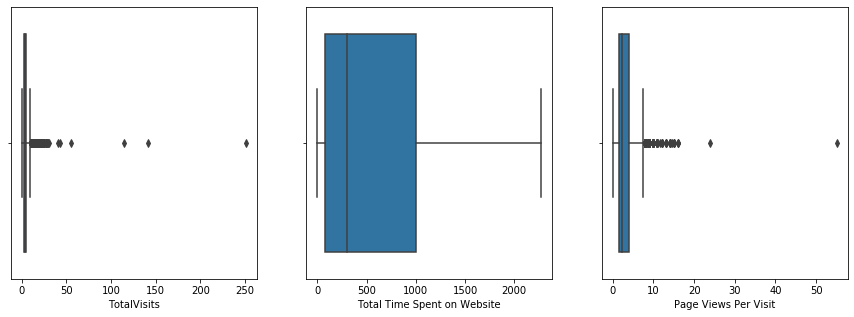

In [72]:
#Visually inspecting the amount of outliers
plt.figure(figsize = (15,5))
feature = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for i in enumerate(feature):
    plt.subplot(1,3,i[0]+1)
    sns.boxplot(Leads[i[1]])

In [73]:
#Replacing outliers with their 95th percentile
q4a = Leads['TotalVisits'].quantile(0.95)
q4b = Leads['Page Views Per Visit'].quantile(0.95)

Leads['TotalVisits'][Leads['TotalVisits']>=q4a]=q4a
Leads['Page Views Per Visit'][Leads['Page Views Per Visit']>=q4b]=q4b

In [74]:
Leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6774.000000,6774.000000,6774.000000,6774.000000
mean,0.347210,3.640094,535.782108,2.588304
std,0.476118,2.739827,547.329257,1.729947
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,75.000000,1.500000
50%,0.000000,3.000000,304.000000,2.250000
75%,1.000000,5.000000,1001.500000,4.000000
max,1.000000,10.000000,2272.000000,6.000000


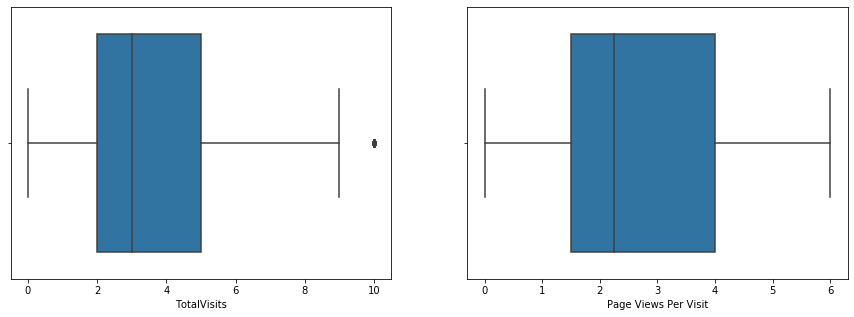

In [75]:
#Viewing features after Outlier treatment
plt.figure(figsize = (15,5))
feature = ['TotalVisits','Page Views Per Visit']
for i in enumerate(feature):
    plt.subplot(1,2,i[0]+1)
    sns.boxplot(Leads[i[1]])

In [76]:
#checking percentage of rows retained
round(len(Leads)/9240*100,2)

73.31

#### We have 73% of rows retained after EDA.

### Creating Dummy Variable 

In [77]:
Leads

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,City,A free copy of Mastering The Interview,Last Notable Activity
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Others,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Others,Others,Mumbai,No,Modified
5,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Others,Mumbai,No,Modified
6,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Others,Mumbai,No,Modified
7,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Others,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Others,Others,Mumbai,No,Others
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Others,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Others,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,Human Resource Management,Other Metro Cities,No,SMS Sent


In [78]:
#Converting some binary variables (Yes/No) to 0/1
Leads['A free copy of Mastering The Interview'] = Leads['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0})

In [79]:
# checking values
Leads['A free copy of Mastering The Interview'] 

2       1
3       0
5       0
6       0
7       0
       ..
9235    0
9236    1
9237    1
9238    0
9239    1
Name: A free copy of Mastering The Interview, Length: 6774, dtype: int64

In [80]:
#Creating dummy variables
ml = pd.get_dummies(Leads['Lead Origin'], prefix='LO',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,ml], axis=1)

ml = pd.get_dummies(Leads['Lead Source'], prefix='LS',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,ml], axis=1)

ml = pd.get_dummies(Leads['Last Activity'], prefix='LA',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,ml], axis=1)

ml = pd.get_dummies(Leads['Specialization'], prefix='Spec',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,ml], axis=1)

ml = pd.get_dummies(Leads['City'], prefix='City',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,ml], axis=1)

ml = pd.get_dummies(Leads['Last Notable Activity'], prefix='LNA',drop_first=True)
#Adding the results to the master dataframe
Leads = pd.concat([Leads,ml], axis=1)

In [81]:
#Dropping the original columns after creating their dummy variables
Leads.drop(columns=['Lead Origin','Lead Source','Last Activity','Specialization','City','Last Notable Activity'], inplace=True)

### Analysing Correlations

In [82]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

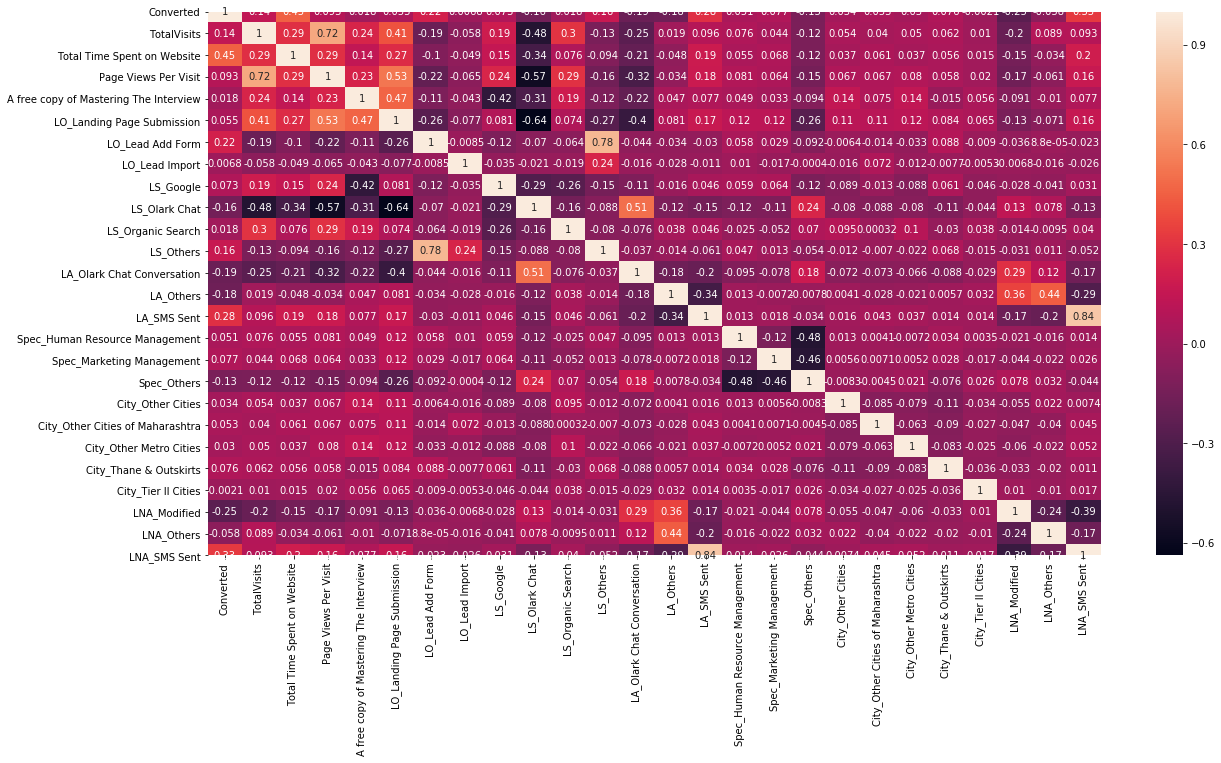

In [83]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads.corr(),annot = True)
plt.show()

#### Removing the Most correlated Columns after analysing it

In [84]:
Leads.drop(['LA_SMS Sent'], axis=1,inplace=True)

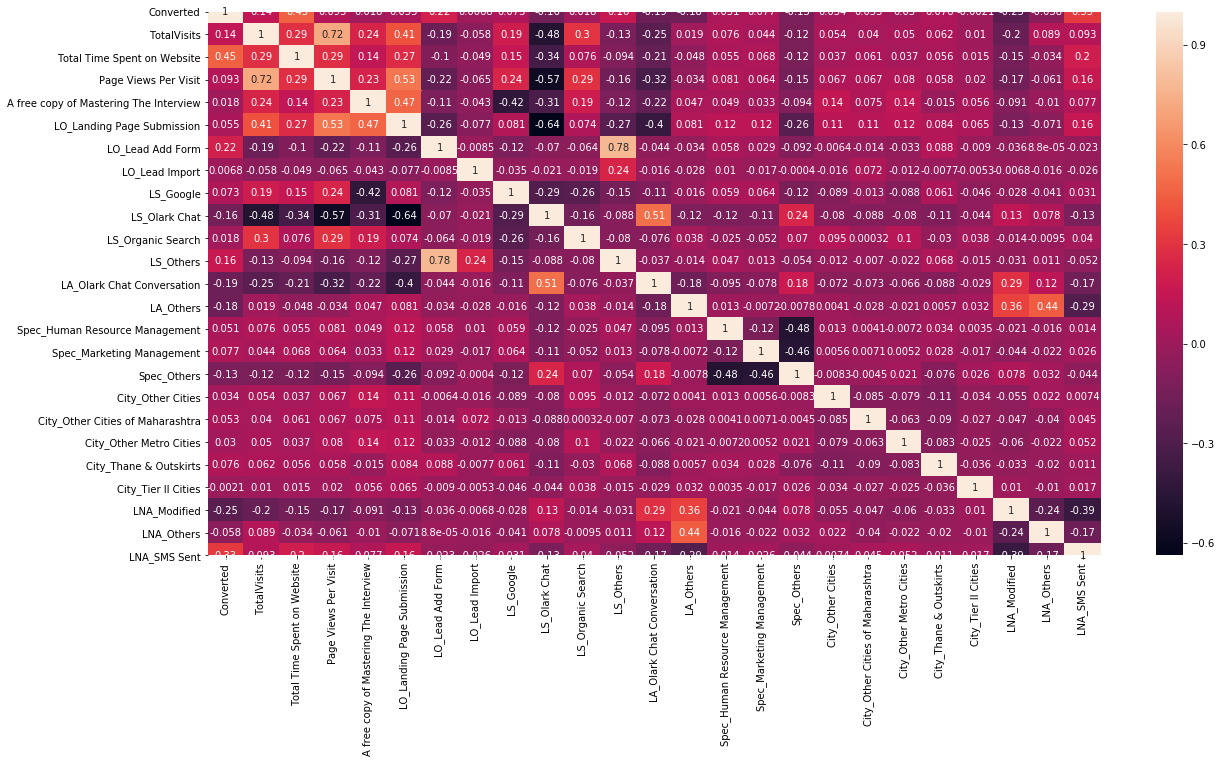

In [85]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Leads.corr(),annot = True)
plt.show()

### Test-Train Split

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# Putting feature variable to X
X = Leads.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LS_Organic Search,...,Spec_Marketing Management,Spec_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,LNA_Modified,LNA_Others,LNA_SMS Sent
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,0.0,0,0.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6,2.0,1640,2.0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
7,0.0,0,0.0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0


In [88]:
# Putting response variable to y
y = Leads['Converted']

y.head()

2    1
3    0
5    0
6    1
7    0
Name: Converted, dtype: int64

In [89]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

###  Feature Scaling

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LS_Organic Search,...,Spec_Marketing Management,Spec_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,LNA_Modified,LNA_Others,LNA_SMS Sent
6213,-1.332899,-0.973505,-1.496864,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
487,-0.601205,-0.728724,-0.344834,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6510,0.130489,-0.584413,0.807196,1,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
5013,-1.332899,-0.973505,-1.496864,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
4023,2.325570,1.203950,1.383211,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [92]:
# Checking the Churn Rate
Converted = (sum(Leads['Converted'])/len(Leads['Converted'].index))*100
Converted

34.720992028343666

We have almost 35% churn rate

In [93]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4741 entries, 6213 to 7742
Data columns (total 24 columns):
TotalVisits                               4741 non-null float64
Total Time Spent on Website               4741 non-null float64
Page Views Per Visit                      4741 non-null float64
A free copy of Mastering The Interview    4741 non-null int64
LO_Landing Page Submission                4741 non-null uint8
LO_Lead Add Form                          4741 non-null uint8
LO_Lead Import                            4741 non-null uint8
LS_Google                                 4741 non-null uint8
LS_Olark Chat                             4741 non-null uint8
LS_Organic Search                         4741 non-null uint8
LS_Others                                 4741 non-null uint8
LA_Olark Chat Conversation                4741 non-null uint8
LA_Others                                 4741 non-null uint8
Spec_Human Resource Management            4741 non-null uint8
Spec_Marketing M

## RFE MODEL

In [94]:
X_train.iloc[:10,:20]

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Others,LA_Olark Chat Conversation,LA_Others,Spec_Human Resource Management,Spec_Marketing Management,Spec_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts
6213,-1.332899,-0.973505,-1.496864,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
487,-0.601205,-0.728724,-0.344834,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6510,0.130489,-0.584413,0.807196,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5013,-1.332899,-0.973505,-1.496864,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
4023,2.325570,1.203950,1.383211,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8286,-0.235358,1.753794,0.231181,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7365,-1.332899,-0.973505,-1.496864,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1769,-0.235358,1.355568,0.231181,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
141,0.862182,-0.578933,-0.344834,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
5140,0.496336,-0.951584,-0.534919,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0


### Feature Selection Using RFE

In [95]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [96]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [97]:
rfe.support_

array([False,  True, False, False, False,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True,  True])

In [98]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('A free copy of Mastering The Interview', False, 10),
 ('LO_Landing Page Submission', False, 5),
 ('LO_Lead Add Form', True, 1),
 ('LO_Lead Import', True, 1),
 ('LS_Google', True, 1),
 ('LS_Olark Chat', True, 1),
 ('LS_Organic Search', False, 9),
 ('LS_Others', True, 1),
 ('LA_Olark Chat Conversation', True, 1),
 ('LA_Others', True, 1),
 ('Spec_Human Resource Management', False, 4),
 ('Spec_Marketing Management', False, 7),
 ('Spec_Others', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Other Cities of Maharashtra', True, 1),
 ('City_Other Metro Cities', True, 1),
 ('City_Thane & Outskirts', True, 1),
 ('City_Tier II Cities', False, 8),
 ('LNA_Modified', False, 6),
 ('LNA_Others', True, 1),
 ('LNA_SMS Sent', True, 1)]

In [99]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'LO_Lead Add Form', 'LO_Lead Import',
       'LS_Google', 'LS_Olark Chat', 'LS_Others', 'LA_Olark Chat Conversation',
       'LA_Others', 'Spec_Others', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'LNA_Others', 'LNA_SMS Sent'],
      dtype='object')

In [100]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'LO_Landing Page Submission',
       'LS_Organic Search', 'Spec_Human Resource Management',
       'Spec_Marketing Management', 'City_Tier II Cities', 'LNA_Modified'],
      dtype='object')

### Creating Model using Stats API

In [101]:
import statsmodels.api as sm

In [102]:
# Import Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4741
Model:                            GLM   Df Residuals:                     4725
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.1
Date:                Mon, 20 Jul 2020   Deviance:                       4168.2
Time:                        22:36:23   Pearson chi2:                 4.90e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.1621      0.093    -12.436      0.000      -1.345      -0.979
Total Time Spent on Website          1.1596      0.043     26.970      0.000       1.075       1.244
LO_Lead Add Form                     4.7361      0.527      8.982      0.000       3.703       5.770
LO_Lead Import                       1.4418      0.662      2.177      0.029       0.144       2.740
LS_Google                            0.3595      0.086      4.180      0.000       0.191       0.528
LS_Olark Chat                        0.8563      0.151      5.667      0.000       0.560       1.152
LS_Others                            0.4420      0.328      1.349      0.177      -0.200       1.084
LA_Olark Chat Conversation          -1.8196      0.236     -7.695      0.000      -2.283      -1.356
LA_Others                           -0.9780      0.127     -7.673      0.000      -1.228      -0.728
Spec_Others                         -0.2791      0.081     -3.461      0.001      -0.437      -0.121
City_Other Cities                    0.3718      0.131      2.836      0.005       0.115       0.629
City_Other Cities of Maharashtra     0.2701      0.157      1.718      0.086      -0.038       0.578
City_Other Metro Cities              0.3379      0.157      2.159      0.031       0.031       0.645
City_Thane & Outskirts               0.3947      0.123      3.198      0.001       0.153       0.637
LNA_Others                           0.7259      0.169      4.294      0.000       0.395       1.057
LNA_SMS Sent                         1.3217      0.094     14.035      0.000       1.137       1.506
====================================================================================================
"""

In [103]:
# Removing Features with high p-value
var = list(col)
var.remove('LS_Others')

In [104]:
X_train[var]

,Total Time Spent on Website,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LA_Olark Chat Conversation,LA_Others,Spec_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,LNA_Others,LNA_SMS Sent
6213,-0.973505,0,0,0,1,0,0,1,0,0,0,0,0,0
487,-0.728724,0,0,1,0,0,0,1,0,0,0,0,0,0
6510,-0.584413,0,0,0,0,0,0,1,0,0,0,1,0,1
5013,-0.973505,0,0,0,1,1,0,1,0,0,0,0,0,0
4023,1.203950,0,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8284,-0.372513,0,0,1,0,0,0,1,0,0,0,0,0,0
125,-0.876689,0,0,0,0,1,0,1,0,0,0,0,0,0
5407,0.672373,0,0,0,0,0,0,1,0,0,0,0,0,0
8196,-0.557012,0,0,0,0,0,0,1,0,0,0,0,0,0


In [105]:
X_train_sm = sm.add_constant(X_train[var])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4741
Model:                            GLM   Df Residuals:                     4726
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2084.9
Date:                Mon, 20 Jul 2020   Deviance:                       4169.9
Time:                        22:36:23   Pearson chi2:                 4.89e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -1.1500      0.093    -12.380      0.000      -1.332      -0.968
Total Time Spent on Website          1.1574      0.043     26.965      0.000       1.073       1.242
LO_Lead Add Form                     5.1496      0.432     11.934      0.000       4.304       5.995
LO_Lead Import                       1.8686      0.583      3.207      0.001       0.727       3.011
LS_Google                            0.3477      0.085      4.069      0.000       0.180       0.515
LS_Olark Chat                        0.8399      0.150      5.582      0.000       0.545       1.135
LA_Olark Chat Conversation          -1.8153      0.237     -7.673      0.000      -2.279      -1.352
LA_Others                           -0.9759      0.127     -7.659      0.000      -1.226      -0.726
Spec_Others                         -0.2763      0.081     -3.429      0.001      -0.434      -0.118
City_Other Cities                    0.3674      0.131      2.807      0.005       0.111       0.624
City_Other Cities of Maharashtra     0.2671      0.157      1.699      0.089      -0.041       0.575
City_Other Metro Cities              0.3396      0.157      2.170      0.030       0.033       0.646
City_Thane & Outskirts               0.3950      0.123      3.202      0.001       0.153       0.637
LNA_Others                           0.7308      0.169      4.325      0.000       0.400       1.062
LNA_SMS Sent                         1.3147      0.094     13.994      0.000       1.131       1.499
====================================================================================================
"""

In [106]:
var.remove('City_Other Cities of Maharashtra')

In [107]:
# Final Model Creation with the best P-Value and lowest Vif
X_train_sm = sm.add_constant(X_train[var])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4741
Model:                            GLM   Df Residuals:                     4727
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.4
Date:                Mon, 20 Jul 2020   Deviance:                       4172.7
Time:                        22:36:23   Pearson chi2:                 4.89e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -1.1179      0.091    -12.307      0.000      -1.296      -0.940
Total Time Spent on Website     1.1592      0.043     27.028      0.000       1.075       1.243
LO_Lead Add Form                5.1359      0.431     11.908      0.000       4.291       5.981
LO_Lead Import                  1.9446      0.580      3.354      0.001       0.808       3.081
LS_Google                       0.3377      0.085      3.962      0.000       0.171       0.505
LS_Olark Chat                   0.8186      0.150      5.474      0.000       0.526       1.112
LA_Olark Chat Conversation     -1.8237      0.236     -7.721      0.000      -2.287      -1.361
LA_Others                      -0.9810      0.127     -7.701      0.000      -1.231      -0.731
Spec_Others                    -0.2753      0.081     -3.417      0.001      -0.433      -0.117
City_Other Cities               0.3393      0.130      2.614      0.009       0.085       0.594
City_Other Metro Cities         0.3097      0.155      1.992      0.046       0.005       0.614
City_Thane & Outskirts          0.3688      0.122      3.013      0.003       0.129       0.609
LNA_Others                      0.7293      0.169      4.319      0.000       0.398       1.060
LNA_SMS Sent                    1.3152      0.094     14.005      0.000       1.131       1.499
===============================================================================================
"""

#### Checking VIf

In [108]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[var].columns
vif['VIF'] = [variance_inflation_factor(X_train[var].values, i) for i in range(X_train[var].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Spec_Others,2.09
4,LS_Olark Chat,1.85
6,LA_Others,1.68
5,LA_Olark Chat Conversation,1.62
11,LNA_Others,1.47
3,LS_Google,1.38
12,LNA_SMS Sent,1.29
0,Total Time Spent on Website,1.21
10,City_Thane & Outskirts,1.12
8,City_Other Cities,1.08


#### Predicting using Final Trained Model

In [109]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

6213    0.154066
487     0.130083
6510    0.404504
5013    0.028560
4023    0.584225
8286    0.908269
7365    0.154066
1769    0.626188
141     0.089804
5140    0.023963
dtype: float64

In [110]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.15406575, 0.13008255, 0.40450414, 0.0285603 , 0.58422472,
       0.90826859, 0.15406575, 0.62618799, 0.08980448, 0.02396322])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [111]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head(15)

,Converted,Converted_Prob,CustID
0,0,0.154066,6213
1,0,0.130083,487
2,0,0.404504,6510
3,0,0.028560,5013
4,1,0.584225,4023
5,1,0.908269,8286
6,0,0.154066,7365
7,0,0.626188,1769
8,0,0.089804,141
9,0,0.023963,5140


In [112]:
y_train_pred_final[y_train_pred_final['Converted'] == 1].Converted_Prob.min()

0.017357549249726975

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,CustID,predicted
0,0,0.154066,6213,0
1,0,0.130083,487,0
2,0,0.404504,6510,0
3,0,0.028560,5013,0
4,1,0.584225,4023,1
5,1,0.908269,8286,1
6,0,0.154066,7365,0
7,0,0.626188,1769,1
8,0,0.089804,141,0
9,0,0.023963,5140,0


In [114]:
y_train_pred_final.head(10)

,Converted,Converted_Prob,CustID,predicted
0,0,0.154066,6213,0
1,0,0.130083,487,0
2,0,0.404504,6510,0
3,0,0.028560,5013,0
4,1,0.584225,4023,1
5,1,0.908269,8286,1
6,0,0.154066,7365,0
7,0,0.626188,1769,1
8,0,0.089804,141,0
9,0,0.023963,5140,0


## Analysing Metrics

In [115]:
from sklearn import metrics

In [116]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2752  346]
 [ 597 1046]]


In [117]:
# Predicted     not_churn    churn
# Actual
# not_churn        2762      336
# churn            600       1043  

In [118]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8010968150179287


In [119]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6366402921485088

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.8883150419625565

In [122]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11168495803744351


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.7514367816091954


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8217378321887131


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [125]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [126]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False)

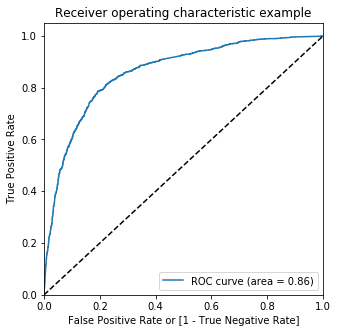

In [127]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [128]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.154066,6213,0,1,1,0,0,0,0,0,0,0,0
1,0,0.130083,487,0,1,1,0,0,0,0,0,0,0,0
2,0,0.404504,6510,0,1,1,1,1,1,0,0,0,0,0
3,0,0.028560,5013,0,1,0,0,0,0,0,0,0,0,0
4,1,0.584225,4023,1,1,1,1,1,1,1,0,0,0,0


In [129]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.346551  1.000000  0.000000
0.1   0.1  0.547775  0.970785  0.323434
0.2   0.2  0.742459  0.874011  0.672692
0.3   0.3  0.786121  0.818016  0.769206
0.4   0.4  0.804472  0.742544  0.837314
0.5   0.5  0.801097  0.636640  0.888315
0.6   0.6  0.791183  0.542301  0.923176
0.7   0.7  0.768614  0.422398  0.952227
0.8   0.8  0.734233  0.287279  0.971272
0.9   0.9  0.701118  0.157030  0.989671


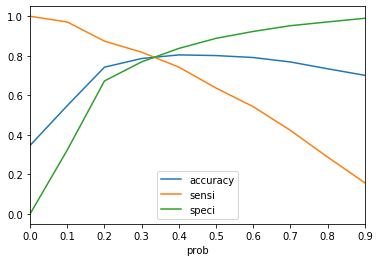

In [130]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.33 is the optimum point to take it as a cutoff probability.

In [131]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.154066,6213,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.130083,487,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.404504,6510,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.028560,5013,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.584225,4023,1,1,1,1,1,1,1,0,0,0,0,1


In [132]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7909723686985868

In [133]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2448,  650],
       [ 341, 1302]])

In [134]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [135]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7924528301886793

In [136]:
# Let us calculate specificity
TN / float(TN+FP)

0.790187217559716

In [137]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.20981278244028406


In [138]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6670081967213115


In [139]:
# Negative predictive value
print (TN / float(TN+ FN))

0.877733954822517


## Precision and Recall

In [140]:
#Looking at the confusion matrix again

In [141]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[2448,  650],
       [ 341, 1302]])

##### Precision
TP / TP + FP

In [142]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6670081967213115

##### Recall
TP / TP + FN

In [143]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7924528301886793

Using sklearn utilities for the same

In [144]:
from sklearn.metrics import precision_score, recall_score

In [145]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6670081967213115

In [146]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7924528301886793

### Precision and recall tradeoff

In [147]:
from sklearn.metrics import precision_recall_curve

In [148]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4736    1
 4737    0
 4738    0
 4739    0
 4740    1
 Name: Converted, Length: 4741, dtype: int64, 0       0
 1       0
 2       1
 3       0
 4       1
        ..
 4736    0
 4737    0
 4738    1
 4739    0
 4740    0
 Name: final_predicted, Length: 4741, dtype: int64)

In [149]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

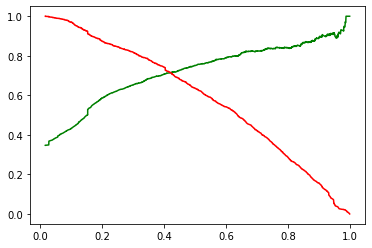

In [150]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [151]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LS_Organic Search,...,Spec_Marketing Management,Spec_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,LNA_Modified,LNA_Others,LNA_SMS Sent
187,-1.332899,-0.973505,-1.496864,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1691,-0.601205,-0.865728,-0.344834,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
7382,-0.967052,-0.799966,-0.920849,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
7207,-1.332899,-0.973505,-1.496864,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3144,-0.235358,-0.816407,-0.632841,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0


In [152]:
X_test = X_test[var]
X_test.head()

,Total Time Spent on Website,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LA_Olark Chat Conversation,LA_Others,Spec_Others,City_Other Cities,City_Other Metro Cities,City_Thane & Outskirts,LNA_Others,LNA_SMS Sent
187,-0.973505,1,0,0,0,0,1,1,0,0,0,0,0
1691,-0.865728,0,0,0,0,0,0,1,0,0,1,0,0
7382,-0.799966,0,0,1,0,0,1,0,1,0,0,0,0
7207,-0.973505,0,0,0,1,0,0,1,0,0,0,0,0
3144,-0.816407,0,0,1,0,0,1,1,0,0,0,0,0


In [153]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [154]:
y_test_pred = res.predict(X_test_sm)

In [155]:
y_test_pred[:10]

187     0.836605
1691    0.116296
7382    0.087127
7207    0.154066
3144    0.048205
698     0.108863
3011    0.193740
5541    0.794024
4453    0.919704
8900    0.325179
dtype: float64

In [156]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [157]:
# Let's see the head
y_pred_1.head()

,0
187,0.836605
1691,0.116296
7382,0.087127
7207,0.154066
3144,0.048205


In [158]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [159]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
y_test_df

,Converted,CustID
187,1,187
1691,0,1691
7382,0,7382
7207,0,7207
3144,0,3144
...,...,...
6096,1,6096
8460,1,8460
3107,0,3107
7111,0,7111


In [160]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [161]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [162]:
y_pred_final.head()

,Converted,CustID,0
0,1,187,0.836605
1,0,1691,0.116296
2,0,7382,0.087127
3,0,7207,0.154066
4,0,3144,0.048205


In [163]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [164]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Converted','Converted_Prob'], axis=1)

In [165]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Converted,Converted_Prob
0,187,1,0.836605
1,1691,0,0.116296
2,7382,0,0.087127
3,7207,0,0.154066
4,3144,0,0.048205


#### Analysing Metrics Using Cutoff 0.4

In [166]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [167]:
y_pred_final.head()

,CustID,Converted,Converted_Prob,final_predicted
0,187,1,0.836605,1
1,1691,0,0.116296,0
2,7382,0,0.087127,0
3,7207,0,0.154066,0
4,3144,0,0.048205,0


In [168]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7909493359567142

In [169]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1082,  242],
       [ 183,  526]])

In [170]:
confusion2

array([[2448,  650],
       [ 341, 1302]])

In [171]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [172]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7418899858956276

In [173]:
# Let us calculate specificity
TN / float(TN+FP)

0.8172205438066465

#### Anslysing Metrics Using Cutoff 0.3

In [174]:
y_pred_final['final_predicted1'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)

In [175]:
y_pred_final

,CustID,Converted,Converted_Prob,final_predicted,final_predicted1
0,187,1,0.836605,1,1
1,1691,0,0.116296,0,0
2,7382,0,0.087127,0,0
3,7207,0,0.154066,0,0
4,3144,0,0.048205,0,0
...,...,...,...,...,...
2028,6096,1,0.827119,1,1
2029,8460,1,0.384945,0,1
2030,3107,0,0.321591,0,0
2031,7111,0,0.088580,0,0


In [176]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted1)

0.780619773733399

In [177]:
confusion4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted1 )
confusion4

array([[1018,  306],
       [ 140,  569]])

In [178]:
TP = confusion4[1,1] # true positive 
TN = confusion4[0,0] # true negatives
FP = confusion4[0,1] # false positives
FN = confusion4[1,0] # false negatives

In [179]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8025387870239774

In [180]:
# Let us calculate specificity
TN / float(TN+FP)

0.7688821752265861

In [181]:
# Let us calculate precision
TP / float(TP+FP)

0.6502857142857142

### Adding Lead Score

In [182]:
## adding lead score to test data set 
X_test['Lead Score'] = round(y_test_pred*100,2)

In [183]:
X_test

,Total Time Spent on Website,LO_Lead Add Form,LO_Lead Import,LS_Google,LS_Olark Chat,LA_Olark Chat Conversation,LA_Others,Spec_Others,City_Other Cities,City_Other Metro Cities,City_Thane & Outskirts,LNA_Others,LNA_SMS Sent,Lead Score
187,-0.973505,1,0,0,0,0,1,1,0,0,0,0,0,83.66
1691,-0.865728,0,0,0,0,0,0,1,0,0,1,0,0,11.63
7382,-0.799966,0,0,1,0,0,1,0,1,0,0,0,0,8.71
7207,-0.973505,0,0,0,1,0,0,1,0,0,0,0,0,15.41
3144,-0.816407,0,0,1,0,0,1,1,0,0,0,0,0,4.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6096,1.417676,0,0,0,0,0,0,1,0,0,0,0,1,82.71
8460,-0.628254,0,0,1,0,0,0,1,0,0,0,0,1,38.49
3107,-0.843808,0,0,0,0,0,0,1,0,1,0,0,1,32.16
7111,-0.809100,0,0,0,0,0,0,1,0,0,0,0,0,8.86


In [184]:
Leads_final = pd.read_csv("Leads.csv")

In [185]:
# y_test_pred = res.predict(X_test_sm)
Leads_final['Lead Score']=round(y_test_pred*100,2)

In [186]:
#getting the prospect Leads
Leads_final = Leads_final[['Prospect ID','Lead Number','Lead Score']].dropna()

In [187]:
#Leads which should be focussed upon
Leads_final[Leads_final['Lead Score'] > 33.00]

,Prospect ID,Lead Number,Lead Score
24,ecd117ca-375f-49ea-afd6-b52b84d00c69,660458,62.22
59,d22bfe40-a444-4e97-b6b7-ccf40117710b,659937,33.13
64,3ee81e25-e280-428d-94a8-af0178917bf5,659889,70.19
70,671f2615-8210-4792-abdd-a1588060cd27,659819,61.94
111,67bc9f1f-53c0-49be-96f9-1d549f0a8717,659371,64.82
...,...,...,...
9230,d11c15b7-8056-45a6-8954-771c0d0495fe,579701,48.34
9231,4aeae36b-2b57-494f-bdab-dd58844286b4,579697,49.19
9232,2d0109e9-dfb2-4664-83de-c2ea75ec7516,579642,94.36
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,75.65


In [188]:
Leads_final[Leads_final['Lead Score'] > 40.00]

,Prospect ID,Lead Number,Lead Score
24,ecd117ca-375f-49ea-afd6-b52b84d00c69,660458,62.22
64,3ee81e25-e280-428d-94a8-af0178917bf5,659889,70.19
70,671f2615-8210-4792-abdd-a1588060cd27,659819,61.94
111,67bc9f1f-53c0-49be-96f9-1d549f0a8717,659371,64.82
137,d76f5ba7-b432-43b5-8dda-aad9fded162e,659141,95.18
...,...,...,...
9229,5cfdd915-d5a0-4976-b38d-e5f72ec55526,579712,58.66
9230,d11c15b7-8056-45a6-8954-771c0d0495fe,579701,48.34
9231,4aeae36b-2b57-494f-bdab-dd58844286b4,579697,49.19
9232,2d0109e9-dfb2-4664-83de-c2ea75ec7516,579642,94.36


## CONCLUSION
####  The Optimal cutoff is 0.33,  which gives high sensitivity of approx 80% as expected by the CEO, however if we require the model to have high specificity we should use a cutoff of 0.4 as suggested by the precision-recall Tradeoff graph.

                                              ---- end of file ----